# QUALITY PREDICTION IN A MINING PROCESS

# Importing the Libraries

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [2]:
#Importing the Dataset
df=pd.read_csv('MiningProcess_Flotation_Plant_Database.csv', decimal=',',parse_dates=["date"],infer_datetime_format=True, sep=',')
df.head()
d=df

In [3]:
df.shape

(737453, 24)

In [4]:
df = df.dropna()
df.shape

(737453, 24)

# **There is no null values in the data set**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

# Observations :
       All Variables are in float64 type

In [6]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,...,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,...,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,...,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,...,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,...,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


# Visualize data distribution to identify whether outliers exist

In [7]:
df=df.set_index('date')

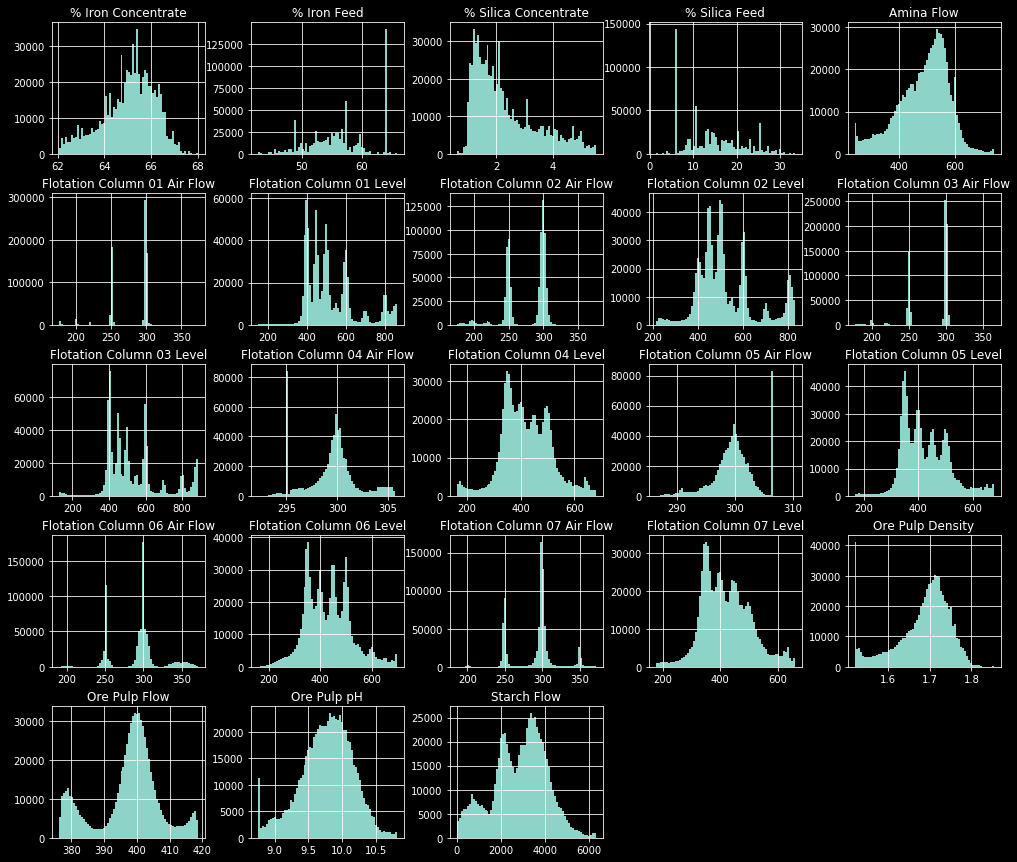

Text(0.5, 0.98, 'figure title')

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])
df.hist(bins = 70, figsize = (17,15))
plt.show()
plt.suptitle('figure title', color='w')

# Remove Outliers using IQRscore method, removing datapoints 


In [9]:
#Find outliers using IQR Score(i.e. IQR=Q3-Q1) 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

% Iron Feed                        7.050000
% Silica Feed                     10.660000
Starch Flow                     1651.410000
Amina Flow                       121.461000
Ore Pulp Flow                      8.704000
Ore Pulp pH                        0.510640
Ore Pulp Density                   0.081020
Flotation Column 01 Air Flow      49.868000
Flotation Column 02 Air Flow      50.233000
Flotation Column 03 Air Flow      49.527000
Flotation Column 04 Air Flow       2.375434
Flotation Column 05 Air Flow       3.723137
Flotation Column 06 Air Flow      40.520000
Flotation Column 07 Air Flow      45.602000
Flotation Column 01 Level        177.136000
Flotation Column 02 Level        153.581000
Flotation Column 03 Level        189.924000
Flotation Column 04 Level        128.870000
Flotation Column 05 Level        126.676000
Flotation Column 06 Level        134.187000
Flotation Column 07 Level        119.693000
% Iron Concentrate                 1.490000
% Silica Concentrate            

In [10]:
df = df[~((df < (Q1 - 3 * IQR)) |(df > (Q3 + 3 * IQR))).any(axis=1)]
df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71


# Observation
6 rows containing outliers in the dataset have been removed.

In [11]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737447.000000,737447.000000,737447.000000,737447.000000,737447.000000,737447.000000,737447.000000,737447.000000,737447.000000,737447.000000,...,737447.000000,737447.000000,737447.000000,737447.000000,737447.000000,737447.000000,737447.000000,737447.000000,737447.000000,737447.000000
mean,56.294687,14.651773,2869.150271,488.145988,397.578435,9.767641,1.680381,280.152174,277.160203,281.082529,...,290.755173,520.243266,522.651312,531.350502,420.320555,425.251028,429.940041,421.022374,65.050075,2.326762
std,5.157726,6.807431,1215.201784,91.229121,9.699727,0.387007,0.069248,29.621152,30.149363,28.558225,...,28.669778,131.013319,128.163713,150.840309,91.793512,84.534540,89.860798,84.890659,1.118643,1.125556
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.330000,431.797000,394.264000,9.527365,1.647310,250.281000,250.458000,250.855000,...,256.302000,416.978000,441.884500,411.324500,356.679500,357.653500,358.497000,356.773000,64.370000,1.440000
50%,56.080000,13.850000,3018.440000,504.394000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,...,299.011000,491.878000,495.957000,494.317000,411.974000,408.773000,424.664000,411.067000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257043,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,...,301.904000,594.113000,595.464000,601.248500,485.548000,484.328000,492.684000,476.466000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


In [12]:
df = df.reset_index()
df=df.groupby(df.index//30).median()
df.shape
d=df

In [13]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,24582.000000,24582.000000,24582.000000,24582.000000,24582.000000,24582.000000,24582.000000,24582.000000,24582.000000,24582.000000,...,24582.000000,24582.000000,24582.000000,24582.000000,24582.000000,24582.000000,24582.000000,24582.000000,24582.000000,24582.000000
mean,56.294730,14.651733,2918.149509,488.591290,397.556962,9.767698,1.680628,280.147808,277.182628,280.906420,...,290.801379,520.645954,524.439943,531.436529,420.682205,425.184579,432.198802,420.376866,65.050229,2.326596
std,5.157822,6.807544,1132.930118,89.652991,9.171695,0.386823,0.068933,29.603148,29.624067,28.500565,...,27.672151,128.306803,123.861903,148.798275,83.477035,79.315976,79.140510,76.627102,1.118437,1.125252
min,42.740000,1.310000,0.947310,241.702895,376.363581,8.753374,1.519832,175.787972,176.418806,176.511299,...,186.823000,151.518700,211.485556,127.137600,162.519543,167.246370,162.481615,177.495552,62.050000,0.600000
25%,52.670000,8.940000,2124.771250,433.260000,397.345125,9.527449,1.647716,250.173000,250.183000,250.105625,...,283.644807,405.585625,447.667500,403.068625,354.108125,353.202500,355.033125,352.791000,64.370000,1.440000
50%,56.080000,13.850000,3036.995000,504.963000,399.643250,9.797865,1.697735,299.674000,299.024250,299.427000,...,299.564000,498.716750,499.466500,498.515250,404.581750,403.254000,413.876000,403.089500,65.210000,2.000000
75%,59.720000,19.600000,3710.116250,553.590875,401.322875,10.037550,1.728240,300.009000,300.101000,299.870000,...,300.356000,598.708375,598.948750,600.454125,492.717250,493.349750,497.694500,473.216375,65.860000,3.010000
max,65.780000,33.400000,6292.333404,739.051424,418.566167,10.807772,1.852928,368.518109,312.170500,340.379551,...,355.615500,861.848658,828.483150,886.801347,679.162297,675.095033,698.610870,659.083391,68.010000,5.530000


### Lets reduce the number of variables

In [14]:
 df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.20,16.98,3470.020,563.6905,396.5330,10.078350,1.740000,249.9060,250.9610,249.8400,...,249.807000,448.2375,443.2120,451.9815,453.8060,453.5380,448.9740,452.1400,66.91,1.31
1,55.20,16.98,3596.780,595.2910,398.7525,10.117350,1.740000,254.0810,250.8840,250.5650,...,250.444000,458.8855,491.1315,451.6030,450.1920,466.8985,450.8640,452.4810,66.91,1.31
2,55.20,16.98,3098.095,600.0060,400.3930,10.125900,1.747420,251.0820,250.4330,249.7795,...,250.131500,453.2920,506.8095,446.8310,446.9720,460.3450,469.1340,450.0270,66.91,1.31
3,55.20,16.98,3155.470,595.5200,397.9685,10.116200,1.740310,250.3130,250.5540,249.5215,...,250.159000,449.7390,503.2250,450.9570,461.5615,452.6320,481.8740,444.8810,66.91,1.31
4,55.20,16.98,3321.095,568.4810,400.3710,10.105750,1.719725,250.2525,249.4830,250.2905,...,250.005000,449.2505,505.2335,449.2970,446.1890,453.6070,468.4760,444.0970,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24577,49.75,23.20,4175.665,447.0370,379.1145,9.688475,1.671805,300.1945,300.4105,299.3615,...,321.985250,398.5675,502.7310,857.9380,398.3145,499.6810,393.9690,397.9995,64.27,1.71
24578,49.75,23.20,4521.510,472.7820,383.0250,9.673630,1.665950,298.6945,301.0280,299.9240,...,325.797167,399.9495,503.7060,868.9575,401.1130,509.0535,400.3575,399.4860,64.27,1.71
24579,49.75,23.20,3529.550,465.6785,380.4340,9.655420,1.662980,300.0445,300.1425,299.4785,...,307.019500,396.7040,493.6225,883.0780,396.5850,499.0925,398.2015,397.6155,64.27,1.71
24580,49.75,23.20,3170.485,457.3580,380.4505,9.610985,1.654975,299.7015,300.5340,299.9185,...,310.806300,403.2745,516.3355,881.6850,404.1700,498.2960,407.1600,402.0190,64.27,1.71


In [15]:
silic_corr = df.corr()['% Silica Concentrate']
silic_corr = abs(silic_corr).sort_values()
silic_corr

Flotation Column 04 Air Flow    0.005209
Ore Pulp Flow                   0.008583
Flotation Column 05 Air Flow    0.009898
Flotation Column 03 Level       0.015124
Flotation Column 01 Level       0.017446
Flotation Column 02 Level       0.035602
Ore Pulp Density                0.046852
Flotation Column 06 Air Flow    0.050146
Flotation Column 07 Air Flow    0.070789
% Silica Feed                   0.072587
Starch Flow                     0.073229
% Iron Feed                     0.076894
Flotation Column 06 Level       0.120688
Ore Pulp pH                     0.147724
Flotation Column 07 Level       0.158375
Amina Flow                      0.160602
Flotation Column 04 Level       0.166001
Flotation Column 02 Air Flow    0.170046
Flotation Column 05 Level       0.180746
Flotation Column 03 Air Flow    0.218184
Flotation Column 01 Air Flow    0.219026
% Iron Concentrate              0.800233
% Silica Concentrate            1.000000
Name: % Silica Concentrate, dtype: float64

In [16]:
drop_index= silic_corr.index[:14].tolist()  
print (drop_index)

['Flotation Column 04 Air Flow', 'Ore Pulp Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 03 Level', 'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Ore Pulp Density', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', '% Silica Feed', 'Starch Flow', '% Iron Feed', 'Flotation Column 06 Level', 'Ore Pulp pH']


### Above plot shows the correaltions between the features. From the list we can find out the features which affects the % Silica Concentrate the most and discard the least important ones.

In [17]:
df=df.drop(drop_index, axis=1)
df.head()

,Amina Flow,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,563.6905,249.9060,250.961,249.8400,453.8060,453.5380,452.140,66.91,1.31
1,595.2910,254.0810,250.884,250.5650,450.1920,466.8985,452.481,66.91,1.31
2,600.0060,251.0820,250.433,249.7795,446.9720,460.3450,450.027,66.91,1.31
3,595.5200,250.3130,250.554,249.5215,461.5615,452.6320,444.881,66.91,1.31
4,568.4810,250.2525,249.483,250.2905,446.1890,453.6070,444.097,66.91,1.31


In [18]:
Y1 = df['% Silica Concentrate']
X1 = df.drop(['% Silica Concentrate'], axis=1)

In [19]:
X1

,Amina Flow,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 07 Level,% Iron Concentrate
0,563.6905,249.9060,250.9610,249.8400,453.8060,453.5380,452.1400,66.91
1,595.2910,254.0810,250.8840,250.5650,450.1920,466.8985,452.4810,66.91
2,600.0060,251.0820,250.4330,249.7795,446.9720,460.3450,450.0270,66.91
3,595.5200,250.3130,250.5540,249.5215,461.5615,452.6320,444.8810,66.91
4,568.4810,250.2525,249.4830,250.2905,446.1890,453.6070,444.0970,66.91
...,...,...,...,...,...,...,...,...
24577,447.0370,300.1945,300.4105,299.3615,398.3145,499.6810,397.9995,64.27
24578,472.7820,298.6945,301.0280,299.9240,401.1130,509.0535,399.4860,64.27
24579,465.6785,300.0445,300.1425,299.4785,396.5850,499.0925,397.6155,64.27
24580,457.3580,299.7015,300.5340,299.9185,404.1700,498.2960,402.0190,64.27


In [20]:
import statsmodels.api as sm
model1 = sm.OLS(Y1,X1).fit()
predictions = model1.predict(X1)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     % Silica Concentrate   R-squared (uncentered):                   0.815
Model:                              OLS   Adj. R-squared (uncentered):              0.815
Method:                   Least Squares   F-statistic:                          1.350e+04
Date:                  Sat, 12 Jun 2021   Prob (F-statistic):                        0.00
Time:                          13:08:01   Log-Likelihood:                         -37505.
No. Observations:                 24582   AIC:                                  7.503e+04
Df Residuals:                     24574   BIC:                                  7.509e+04
Df Model:                             8                                                  
Covariance Type:              nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Amina Flow                       0.0029   8.07e-05     36.280      0.000       0.003       0.003
Flotation Column 01 Air Flow    -0.0081      0.001     -9.677      0.000      -0.010      -0.006
Flotation Column 02 Air Flow     0.0041      0.001      8.038      0.000       0.003       0.005
Flotation Column 03 Air Flow    -0.0004      0.001     -0.398      0.691      -0.002       0.001
Flotation Column 04 Level       -0.0004      0.000     -2.849      0.004      -0.001      -0.000
Flotation Column 05 Level       -0.0007      0.000     -4.332      0.000      -0.001      -0.000
Flotation Column 07 Level     -6.88e-05      0.000     -0.436      0.663      -0.000       0.000
% Iron Concentrate               0.0398      0.001     26.860      0.000       0.037       0.043
==============================================================================
Omnibus:                     2659.273   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3624.589
Skew:                           0.937   Prob(JB):                         0.00
Kurtosis:                       3.157   Cond. No.                         212.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Splitting the dataset into the Training set and Test set

In [21]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1,test_size = 0.2, random_state=30)

In [22]:
X_train

,Amina Flow,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 07 Level,% Iron Concentrate
1587,556.9075,250.3695,249.4720,250.4720,405.9865,408.8960,406.4470,66.070000
3632,326.4155,250.1610,250.4475,250.4110,444.7645,406.4985,434.1915,65.720000
13409,558.4960,299.9180,298.4940,299.7305,301.5415,397.0880,388.1685,67.040000
17407,418.9725,299.7555,300.9930,299.4390,499.0340,504.5375,495.5310,65.240000
6325,489.5020,250.1670,249.2345,249.6945,355.2190,353.6910,341.1385,62.701132
...,...,...,...,...,...,...,...,...
500,416.3055,250.8290,249.3680,250.3180,546.4145,582.5620,572.4920,66.170000
12077,493.7710,299.5265,299.6535,299.7860,505.0650,500.4280,502.1070,65.070000
15277,599.2605,300.3805,300.5430,299.7035,500.7760,502.1735,501.0695,66.200000
4517,599.7340,308.7920,292.4055,296.0895,349.2160,382.5580,387.2950,63.860000


In [23]:
y_train

1587     1.960000
3632     1.480000
13409    0.860000
17407    2.090000
6325     4.689205
           ...   
500      1.380000
12077    2.710000
15277    1.220000
4517     4.960000
5925     3.873196
Name: % Silica Concentrate, Length: 19665, dtype: float64

In [24]:
# define the data/predictors as the pre-set feature names  
features = X_train.iloc[:,:].values
features

array([[556.9075    , 250.3695    , 249.472     , ..., 408.896     ,
        406.447     ,  66.07      ],
       [326.4155    , 250.161     , 250.4475    , ..., 406.4985    ,
        434.1915    ,  65.72      ],
       [558.496     , 299.918     , 298.494     , ..., 397.088     ,
        388.1685    ,  67.04      ],
       ...,
       [599.2605    , 300.3805    , 300.543     , ..., 502.1735    ,
        501.0695    ,  66.2       ],
       [599.734     , 308.792     , 292.4055    , ..., 382.558     ,
        387.295     ,  63.86      ],
       [558.4515    , 300.0055    , 298.2075    , ..., 344.131     ,
        348.3575    ,  62.39344875]])

In [25]:
labels = y_train.iloc[:].values
labels

array([1.96      , 1.48      , 0.86      , ..., 1.22      , 4.96      ,
       3.87319588])

In [26]:
X=features
y=labels

# Multiple linear regression model

In [27]:
# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X,y) 

In [28]:
predictions = model.predict(X)

In [29]:
predictions

array([1.80251663, 1.82270838, 0.791457  , ..., 1.37502984, 3.25750687,
       4.39276254])

# Check model accuracy

In [30]:
#Check model accuracy
accuracy=model.score(X,y)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.6697650094501864


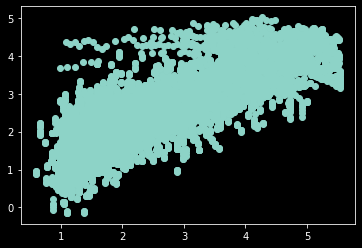

In [32]:
#Visualize the predictions
plt.scatter(y, predictions)

# Observation
The model is  linear.

# Predicting a new result

In [33]:
#Define new data instance
Xnew = [[556.9075, 250.3695, 249.472 , 250.472 , 405.9865, 408.896 ,
       406.447 ,  66.07  ]]

#Make a Prediction
ynew = model.predict(Xnew)

#Show the inputs and predicted outputs
print("New Quantities of features=%s, Percentage of Silica concentrate=%s" % (Xnew,ynew))


New Quantities of features=[[556.9075, 250.3695, 249.472, 250.472, 405.9865, 408.896, 406.447, 66.07]], Percentage of Silica concentrate=[1.80251663]


# Model for evaluation for training set and testing set

In [34]:
#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [35]:
# model evaluation for training set
import numpy as np
import statsmodels.api as sm
mse_training = mean_squared_error(y_train, y_train_prediction)
model = sm.OLS(y_train, y_train_prediction).fit()

print("The model performance for training set")
print("--------------------------------------")
print('MSE is :{}'.format(mse_training))
print('Adjusted R-Squared is :{}'.format(model.rsquared_adj))
print("\n")

# model evaluation for testing set
mse_testing = mean_squared_error(y_test, y_test_prediction)
model = sm.OLS(y_test, y_test_prediction).fit()

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is : ', mse_testing)
print('Adjusted R-Squared is : ', model.rsquared_adj)

The model performance for training set
--------------------------------------
MSE is :0.4220018551989438
Adjusted R-Squared is :0.9370437758559526


The model performance for testing set
--------------------------------------
MSE is :  0.39746899086882853
Adjusted R-Squared is :  0.939621934993


# Random Forest Regression

# Training the Random Forest Regression model


In [45]:
from sklearn.ensemble import RandomForestRegressor
import math
import sklearn.metrics as metrics
regressor = RandomForestRegressor(n_estimators = 40, random_state = 42)
regressor.fit(X, y) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

# Check model accuracy

In [46]:
accuracy=regressor.score(X,y)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.9762235519188851


# Predicting a new result

In [49]:
y_pred = regressor.predict([[59.89,8.98,169.160114,560.608,9.52851,516.110000,598.4390,65.150]])

In [50]:
y_pred

array([3.554])

# Model for evaluation for training set and testing set

In [51]:
# Show model results of training set
y_hat = regressor.predict(X_train)
mse = metrics.mean_squared_error(y_train,y_hat)
print ("TRAINING SET")
print ("============")
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", regressor.score(X_train,y_train))
# Show model results of testing set
y_hat = regressor.predict(X_test)
mse = metrics.mean_squared_error(y_test,y_hat)
print ("TESTING SET")
print ("============")
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", regressor.score(X_test,y_test))

TRAINING SET
RMSE:                0.17430872435550218
r2:                  0.9762235519188851
TESTING SET
RMSE:                0.44818136593987984
r2:                  0.8352244658794645


# Observation
1.This Random Forest Regressor has a higher R-squared compared to Multiple linear regression model and 
  the best RMSE Score 

# Decision Tree Regression


In [78]:
#Fit Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
#Create the Decision Tree regressor object 
dtr = DecisionTreeRegressor(random_state=10)

In [79]:
#Fit the regressor object to the dataset.
dtr.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

# Predict a new result

In [80]:
#Predict a new result
y_pred1 = dtr.predict([[59.89,8.98,169.160114,560.608,9.52851,516.110000,598.4390,65.150]])

In [81]:
y_pred1

array([2.07])

# Check model accuracy

In [82]:
accuracy=dtr.score(X,y)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.9999999999693436


In [83]:
# Show model results of training set
y_hat = dtr.predict(X_train)
mse = metrics.mean_squared_error(y_train,y_hat)
print ("TRAINING SET")
print ("============")
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", dtr.score(X_train,y_train))
# Show model results of testing set
y_hat = dtr.predict(X_test)
mse = metrics.mean_squared_error(y_test,y_hat)
print ("TESTING SET")
print ("============")
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", dtr.score(X_test,y_test))

TRAINING SET
RMSE:                6.259015750744061e-06
r2:                  0.9999999999693436
TESTING SET
RMSE:                0.6296889165559185
r2:                  0.6747350742350446


# Visualize the predictions

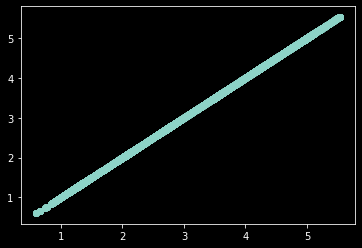

In [84]:
#Visualize the predictions
predictions = dtr.predict(X_train)
plt.scatter(y_train, predictions)

# Observation
1.The Multiple linear regression  has a best Adjusted R-squared and MSE Score.


# **LSTM MODEL**

In [85]:
d.shape
data=d

In [86]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24582 entries, 0 to 24581
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   % Iron Feed                   24582 non-null  float64
 1   % Silica Feed                 24582 non-null  float64
 2   Starch Flow                   24582 non-null  float64
 3   Amina Flow                    24582 non-null  float64
 4   Ore Pulp Flow                 24582 non-null  float64
 5   Ore Pulp pH                   24582 non-null  float64
 6   Ore Pulp Density              24582 non-null  float64
 7   Flotation Column 01 Air Flow  24582 non-null  float64
 8   Flotation Column 02 Air Flow  24582 non-null  float64
 9   Flotation Column 03 Air Flow  24582 non-null  float64
 10  Flotation Column 04 Air Flow  24582 non-null  float64
 11  Flotation Column 05 Air Flow  24582 non-null  float64
 12  Flotation Column 06 Air Flow  24582 non-null  float64
 13  F

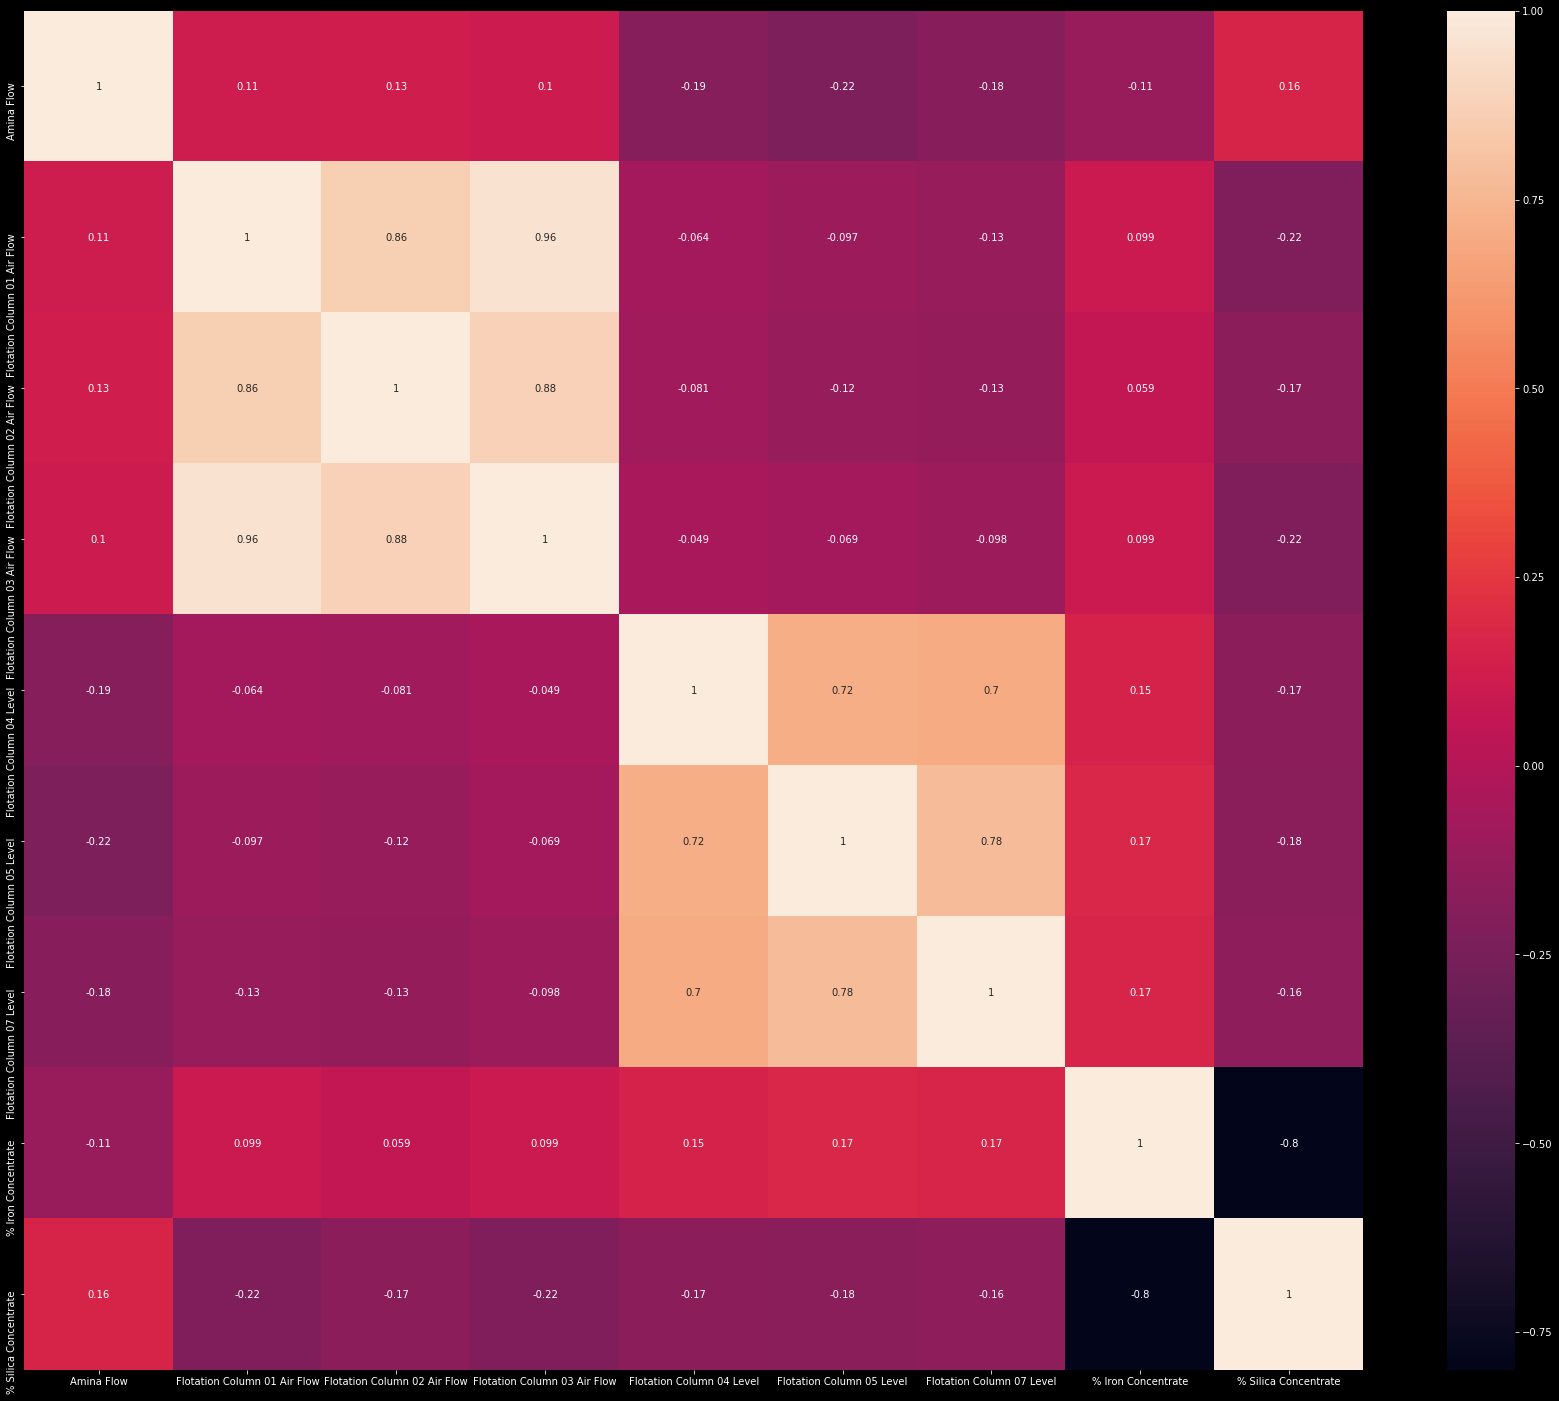

In [87]:
plt.figure(figsize=(30, 25))
p = sns.heatmap(df.corr(), annot=True)

# % Iron Concentrate and % Silica Concentrate are highly correlated.

In [88]:
d = d.drop(['% Iron Concentrate'], axis=1)

In [89]:
data_training = d.iloc[:16582,:]
data_validation = d.iloc[16582:,:]

print(data_training.shape)
print(data_validation.shape)

(16582, 22)
(8000, 22)


In [90]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

In [91]:
entry_variables = ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow',	'Flotation Column 04 Air Flow',	'Flotation Column 05 Air Flow',	'Flotation Column 06 Air Flow',	'Flotation Column 07 Air Flow',	'Flotation Column 01 Level',	'Flotation Column 02 Level',	'Flotation Column 03 Level', 'Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level']

x_transformer = scaler
x_transformer = scaler.fit(data_training[entry_variables].to_numpy())

data_training.loc[:, entry_variables] = x_transformer.transform(data_training[entry_variables].to_numpy())
data_validation.loc[:, entry_variables] = x_transformer.transform(data_validation[entry_variables].to_numpy())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:

In [92]:
y_transformer = scaler
y_transformer = y_transformer.fit(data_training[['% Silica Concentrate']])

data_training['% Silica Concentrate'] = y_transformer.transform(data_training[['% Silica Concentrate']])
data_validation['% Silica Concentrate'] = y_transformer.transform(data_validation[['% Silica Concentrate']])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [93]:
data_training.head(5)

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
0,0.526047,0.485397,0.551910,0.647408,0.471564,0.660005,0.660975,0.400556,0.547983,0.447486,...,0.350852,0.374810,0.417746,0.374426,0.427615,0.563872,0.559390,0.534372,0.570289,0.113924
1,0.526047,0.485397,0.572077,0.710946,0.524796,0.679434,0.660975,0.423119,0.547414,0.451910,...,0.378157,0.379169,0.432738,0.452234,0.427117,0.556872,0.585960,0.537897,0.570997,0.113924
2,0.526047,0.485397,0.492738,0.720427,0.564141,0.683694,0.683250,0.406911,0.544083,0.447117,...,0.357219,0.377031,0.424863,0.477691,0.420835,0.550636,0.572927,0.571975,0.565902,0.113924
3,0.526047,0.485397,0.501866,0.711407,0.505993,0.678861,0.661905,0.402756,0.544977,0.445542,...,0.350582,0.377219,0.419860,0.471870,0.426267,0.578892,0.557588,0.595738,0.555216,0.113924
4,0.526047,0.485397,0.528216,0.657040,0.563613,0.673655,0.600106,0.402429,0.537068,0.450235,...,0.356952,0.376165,0.419173,0.475132,0.424082,0.549120,0.559527,0.570747,0.553588,0.113924


In [94]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [95]:
time_steps = 36

x_train, y_train = create_dataset(data_training, data_training['% Silica Concentrate'], time_steps)
x_test, y_test = create_dataset(data_validation, data_validation['% Silica Concentrate'], time_steps)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(16546, 36, 22) (16546,)
(7964, 36, 22) (7964,)


In [96]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
model = Sequential()
model.add(LSTM(24, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))
model.add(Dropout(rate=0.2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
print(model.summary())

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 24)                4512      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
Total params: 4,537
Trainable params: 4,537
Non-trainable params: 0
_________________________________________________________________
None


In [97]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='loss', patience=10)

In [98]:
model.fit(x_train, y_train, epochs=50, batch_size=100, shuffle=False, callbacks=[callback])


Epoch 1/50
16546/16546 [==============================] - 3s 206us/step - loss: 0.0837 - acc: 6.6481e-04
Epoch 2/50
16546/16546 [==============================] - 3s 208us/step - loss: 0.0470 - acc: 6.6481e-04
Epoch 3/50
16546/16546 [==============================] - 2s 142us/step - loss: 0.0414 - acc: 7.2525e-04
Epoch 4/50
16546/16546 [==============================] - 4s 212us/step - loss: 0.0399 - acc: 7.2525e-04
Epoch 5/50
16546/16546 [==============================] - 2s 136us/step - loss: 0.0405 - acc: 6.6481e-04
Epoch 6/50
16546/16546 [==============================] - 4s 256us/step - loss: 0.0374 - acc: 6.6481e-04
Epoch 7/50
16546/16546 [==============================] - 3s 211us/step - loss: 0.0381 - acc: 6.6481e-04
Epoch 8/50
16546/16546 [==============================] - 3s 183us/step - loss: 0.0379 - acc: 7.2525e-04
Epoch 9/50
16546/16546 [==============================] - 4s 249us/step - loss: 0.0390 - acc: 6.0438e-04- 
Epoch 10/50
16546/16546 [===========================

In [99]:
y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)

In [100]:
from sklearn import metrics
from sklearn.metrics import r2_score
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_predict_train))
print('Training Set RMSE:', rmse_train)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predict_test))
print('Testing Set RMSE:', rmse)

r2 = r2_score(y_test, y_predict_test)
print('Validation R2:', r2)

Training Set RMSE: 0.10242972684111228
Testing Set RMSE: 0.10030692819741337
Validation R2: 0.8177675873728554


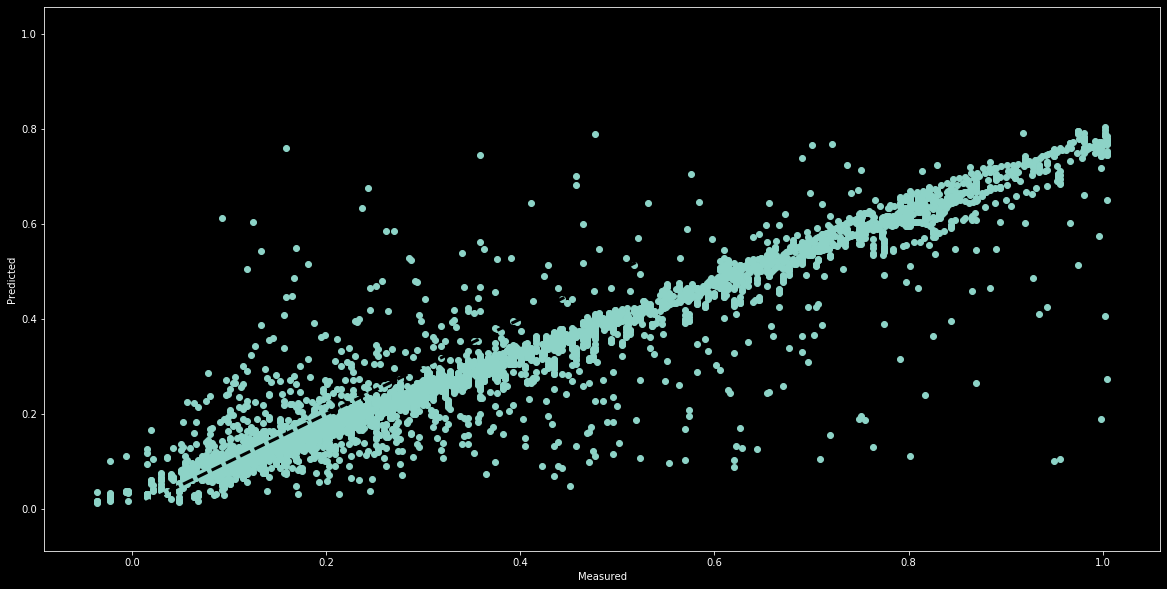

In [101]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(y_test, y_predict_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Observation 
LSTM Model has best R2 score and best RMSE .